In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# carregando o dataframe
path = 'dados_gerais.csv'
dados_gerais = pd.read_csv(path, sep = ';', decimal = ',',encoding = 'latin1')

In [5]:
# Renomeando as colunas seguindo as boas práticas de programação 

dados_gerais.rename(columns={"Negócio - ID":"id_lead",
                             "Negócio - Origem do Lead":"origem_lead",
                             "Organização - Setor":"setor_lead",
                             "Pessoa - Cargo":"cargo_lead",
                             "Organização - Quantos colaboradores tem a empresa":"qnt_colaboradores",
                             "Negócio - Etapa ":"etapa_processo",
                             "Negócio - Status":"status",
                             "Negócio - MKT":"mkt_sem",
                             "Negócio - Negócio criado em": "data_captacao_lead",
                             "Negócio - Data de ganho": "data_concretizacao",
                             "Negócio - Data de perda": "data_desistencia",
                             "Negócio - Valor":"ticket",
                             "Negócio - Motivo da perda":"motivo_perda",
                             },
                          inplace=True)

In [ ]:
# Tratamento dos dados

In [6]:
# Colocando as colunas em formato data

dados_gerais['data_captacao_lead'] = pd.to_datetime(dados_gerais['data_captacao_lead'],
                                            infer_datetime_format='True')
dados_gerais['data_concretizacao'] = pd.to_datetime(dados_gerais['data_concretizacao'],
                                            infer_datetime_format='True')
dados_gerais['data_desistencia'] = pd.to_datetime(dados_gerais['data_desistencia'],
                                            infer_datetime_format='True')


In [7]:
# retirando o texto dos dados numéricos

dados_gerais['ticket'] = dados_gerais['ticket'].apply(lambda x: str(x).replace(" BRL",""))
dados_gerais['ticket'] = dados_gerais['ticket'].apply(lambda x: str(x).replace(".",""))
dados_gerais['ticket'] = dados_gerais['ticket'].apply(lambda x: str(x).replace(",","."))
dados_gerais['ticket'] = dados_gerais['ticket'].astype('float64')

In [8]:
# Tranformando algums colunas de texto em letra maiúscula para evitar erros causados por case sensitive

dados_gerais['status'] = dados_gerais['status'].apply(lambda x: str(x).upper())
dados_gerais['cargo_lead'] = dados_gerais['cargo_lead'].apply(lambda x: str(x).upper())
dados_gerais['motivo_perda'] = dados_gerais['motivo_perda'].apply(lambda x: str(x).upper())


Quantidade de leads gerados por mês: 
    ano  mes  qnt_lead
0  2021    1        89
1  2021    2       105
2  2021    3       185
3  2021    4       198
4  2021    5       133
5  2021    6       132
6  2021    7       222
7  2021    8       554
8  2021    9       117


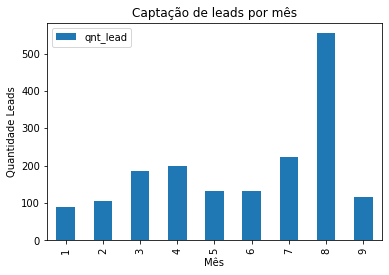

In [9]:
# 1-Negócios
# Quantidade de Negócios criados por mês?

print("\nQuantidade de leads gerados por mês: ")
df_filtro_qnt_negocio = dados_gerais.groupby([dados_gerais['data_captacao_lead'].dt.year.rename('ano'),
                     dados_gerais['data_captacao_lead'].dt.month.rename('mes')]).agg(qnt_lead=pd.NamedAgg('id_lead',
                                                                                                          'count')).reset_index()
print(df_filtro_qnt_negocio)
graf_bar_qnt_negocio_mes = df_filtro_qnt_negocio
graf_bar_qnt_negocio_mes.plot(kind='bar',x='mes',y='qnt_lead')
plt.xlabel("Mês")
plt.ylabel("Quantidade Leads")
plt.title("Captação de leads por mês")
plt.show()


Principais setores: 
                                   setor_lead  qnt_lead
21                                     Outros       192
34                                         TI        69
30                          Serviços de Saúde        42
5                                 Consultoria        35
28                       Serviços de Educação        34
26                       Serviços Financeiros        31
33                                   Software        27
35                                     Varejo        20
4                                    Comércio        17
27                    Serviços de Alimentação        17
7                             Empresa Pública        16
31                     Serviços de Transporte        14
9                                Farmacêutica        12
14                          Indústria Química        12
20                                        ONG        10
0                                   Advocacia         8
8                         

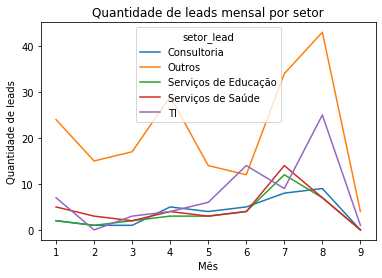

In [10]:
# Evolução mensal (quantidade) dos principais setores das organizações que chegaram

#Definindo os principais setores dos leads
df_principais_setores_todos = dados_gerais.groupby(['setor_lead']).agg(qnt_lead=pd.NamedAgg('id_lead','count')).reset_index()
df_principais_setores_ordenados = df_principais_setores_todos.sort_values(['qnt_lead'], ascending=False)
print("\nPrincipais setores: ")
print(df_principais_setores_ordenados)
df_setores_analisados = df_principais_setores_ordenados['setor_lead'].head(5)
print("\nSetores análisados")
print(df_setores_analisados)

df_filtro_qnt_negocio_setor = dados_gerais.groupby([dados_gerais['data_captacao_lead'].dt.year.rename('ano'),
                     dados_gerais['data_captacao_lead'].dt.month.rename('mes'),
                                    'setor_lead']).agg(qnt_lead=pd.NamedAgg('id_lead','count')).reset_index()
graf_line_qnt_setor_mes = df_filtro_qnt_negocio_setor[df_filtro_qnt_negocio_setor['setor_lead'].isin(df_setores_analisados)]
graf_line_qnt_setor_mes =  graf_line_qnt_setor_mes.pivot(index = 'mes', columns = 'setor_lead', values = 'qnt_lead')
graf_line_qnt_setor_mes = graf_line_qnt_setor_mes.fillna(0)
print("\nTabela de quantidade de leads mensal por setor")
print(graf_line_qnt_setor_mes)
graf_line_qnt_setor_mes.plot.line()
plt.xlabel("Mês")
plt.ylabel("Quantidade de leads")
plt.title("Quantidade de leads mensal por setor")
plt.show()


Principais cargos
                          cargo_lead  qnt_lead
15                    ANALISTA DE RH       383
106                            OUTRO       333
87                     GERENTE DE RH       205
31                               CEO       134
47              COORDENADOR(A) DE RH       126
..                               ...       ...
43   COORDENADOR DE RECURSOS HUMANOS         1
42     COORDENADOR DE GENTE E GESTÃO         1
41       COORDENADOR DA ÁREA TÉCNICA         1
40               CONTROLE DE ESTOQUE         1
132               ÁREA DE BENEFÍCIOS         1

[133 rows x 2 columns]

Cargos análisados
15           ANALISTA DE RH
106                   OUTRO
87            GERENTE DE RH
31                      CEO
47     COORDENADOR(A) DE RH
Name: cargo_lead, dtype: object
      ano  mes                       cargo_lead  qnt_lead
0    2021    1  ANALISTA DE MARKETING / PRODUTO         3
1    2021    1                   ANALISTA DE RH        13
2    2021    1             A

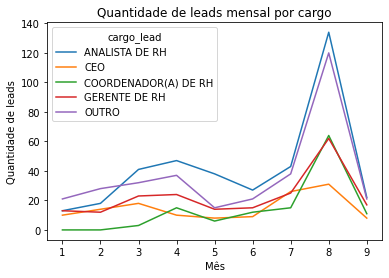

In [11]:
#Evolução mensal (quantidade) dos principais cargos dos leads que chegaram

df_principais_cargos = dados_gerais.groupby(['cargo_lead']).agg(qnt_lead=pd.NamedAgg('id_lead','count')).reset_index()

df_principais_cargos_ordenado = df_principais_cargos.sort_values(['qnt_lead'], ascending=False)
print("\nPrincipais cargos")
print(df_principais_cargos_ordenado)
cargos_analisados = df_principais_cargos_ordenado['cargo_lead'].head(5)
print("\nCargos análisados")
print(cargos_analisados)

df_filtro_qnt_negocio_cargo = dados_gerais.groupby([dados_gerais['data_captacao_lead'].dt.year.rename('ano'),
                     dados_gerais['data_captacao_lead'].dt.month.rename('mes'),
                                    'cargo_lead']).agg(qnt_lead=pd.NamedAgg('id_lead','count')).reset_index()
graf_line_qnt_cargo_mes = df_filtro_qnt_negocio_cargo[df_filtro_qnt_negocio_cargo['cargo_lead'].isin(cargos_analisados)]
graf_line_qnt_cargo_mes = graf_line_qnt_cargo_mes.pivot(index = 'mes', columns = 'cargo_lead', values = 'qnt_lead')
graf_line_qnt_cargo_mes = graf_line_qnt_cargo_mes.fillna(0)
print(df_filtro_qnt_negocio_cargo)
print(graf_line_qnt_cargo_mes)
graf_line_qnt_cargo_mes.plot.line()
plt.xlabel("Mês")
plt.ylabel("Quantidade de leads")
plt.title("Quantidade de leads mensal por cargo")
plt.show()


Quantidade de negócios fechados por mês
      ano  mes  qnt_negocios_ganhos
0  2021.0  3.0                    3
1  2021.0  4.0                    4
2  2021.0  5.0                    3
3  2021.0  6.0                    3
4  2021.0  7.0                    4
5  2021.0  8.0                    6
6  2021.0  9.0                    1


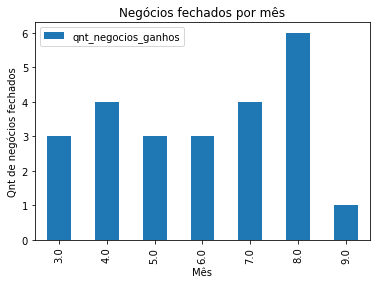

In [12]:
#Quantos negócios foram fechados por mês?

df_filtro_qnt_ganhos = dados_gerais.groupby([dados_gerais['data_concretizacao'].dt.year.rename('ano'),
                      dados_gerais['data_concretizacao'].dt.month.rename('mes')]).agg(qnt_negocios_ganhos=pd.NamedAgg('id_lead'
                                                                                            ,'count')).reset_index()
print("\nQuantidade de negócios fechados por mês")
print(df_filtro_qnt_ganhos)

graf_qnt_negocio_fechado_mes = df_filtro_qnt_ganhos
graf_qnt_negocio_fechado_mes.plot(kind='bar',x='mes',y='qnt_negocios_ganhos')
plt.xlabel("Mês")
plt.ylabel("Qnt de negócios fechados")
plt.title("Negócios fechados por mês")
plt.show()


Receita Mensal: 
      ano  mes  receita_mensal
0  2021.0  3.0         1680.00
1  2021.0  4.0         1880.00
2  2021.0  5.0         2954.16
3  2021.0  6.0         3134.33
4  2021.0  7.0         2352.90
5  2021.0  8.0         6412.01
6  2021.0  9.0         1250.00


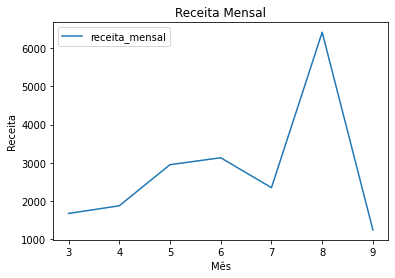

In [13]:
#Qual o valor total vendido mensalmente?

df_receita_mensal = dados_gerais.groupby([dados_gerais['data_concretizacao'].dt.year.rename('ano'),
                      dados_gerais['data_concretizacao'].dt.month.rename('mes')]).agg(receita_mensal=pd.NamedAgg('ticket'
                                                                                                ,'sum')).reset_index()
print("\nReceita Mensal: ")
print(df_receita_mensal)

graf_recita_mensal = df_receita_mensal
graf_recita_mensal.plot(kind='line',x='mes',y='receita_mensal')
plt.xlabel("Mês")
plt.ylabel("Receita")
plt.title("Receita Mensal")
plt.show()

In [14]:
# 3 principais setores vendidos

max_data_fechamento = np.max(dados_gerais['data_concretizacao'])
df_setores_mais_vendidos = dados_gerais[dados_gerais['data_concretizacao']<=max_data_fechamento].\
    groupby(by='setor_lead').agg(receita=pd.NamedAgg('ticket','sum'))
df_setores_mais_vendidos = df_setores_mais_vendidos.sort_values(['receita'], ascending=False)
print("\nReceita gerada por setor")
print(df_setores_mais_vendidos)
print("\nOs três setores que geraram maior receita foram: ")
print(df_setores_mais_vendidos.head(3))


Receita gerada por setor
                                           receita
setor_lead                                        
Outros                                     5197.23
TI                                         2002.01
Varejo                                     1541.66
Comércio                                   1250.00
Serviços de Saúde                          1200.00
Serviços Financeiros                        950.00
Indústria Química                           912.50
Empresa Pública                             830.00
Indústria                                   700.00
Petróleo e energia                          700.00
Capital de risco e participações privadas   630.00
Consultoria                                 490.00
Publicidade e MKT                           420.00
ONG                                         350.00

Os três setores que geraram maior receita foram: 
            receita
setor_lead         
Outros      5197.23
TI          2002.01
Varejo      1541.66



Quantidade de negócios perdidos por mês: 
      ano  mes  qnt_leads
0  2021.0  1.0         20
1  2021.0  2.0         77
2  2021.0  3.0        106
3  2021.0  4.0         98
4  2021.0  5.0         85
5  2021.0  6.0        103
6  2021.0  7.0        204
7  2021.0  8.0        400
8  2021.0  9.0        148


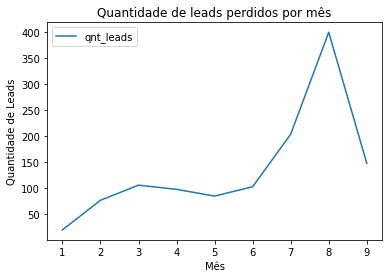

In [15]:
#Quantidade de Negócio perdido por mês

df_filtro_qnt_desistencia = dados_gerais.groupby([dados_gerais['data_desistencia'].dt.year.rename('ano'),
                      dados_gerais['data_desistencia'].dt.month.rename('mes')]).agg(qnt_leads=pd.NamedAgg('ticket',
                                                                                'count')).reset_index()
print("\nQuantidade de negócios perdidos por mês: ")
print(df_filtro_qnt_desistencia)

graf_qnt_negocios_perdidos = df_filtro_qnt_desistencia
graf_qnt_negocios_perdidos.plot(kind='line',x='mes',y='qnt_leads')
plt.xlabel("Mês")
plt.ylabel("Quantidade de Leads")
plt.title("Quantidade de leads perdidos por mês")
plt.show()


Principais motivos da perda de negócios: 
                                motivo_perda  qnt_leads
19                 SEM CONTATO COM A EMPRESA        194
24                       VEIO PARA O WEBINAR        171
11  FORA DE SLA - ABAIXO DE 50 COLABORADORES        162
15           NÃO TINHA INTERESSE NO PROGRAMA        144
12               FORA DE SLA - NÃO É EMPRESA        116
22     SUMIU DEPOIS DA PROSPECÇÃO (GHOSTING)         80
14            NÃO QUER OUVIR/AGENDAR REUNIÃO         53
16               NÃO É PRIORIDADE NO MOMENTO         51
3               DADOS INCORRETOS/INCOMPLETOS         36
6           ENTRAR EM CONTATO POSTERIORMENTE         31
9   FORA DE SLA - ABAIXO DE 20 COLABORADORES         29
23                          SÓ QUER PARCERIA         28
21       SUMIU DEPOIS DA PROPOSTA (GHOSTING)         27
17                    OPTOU PELO CONCORRENTE         23
13                              JÁ É CLIENTE         17
5                    ENCONTROU OUTRA SOLUÇÃO         16
8    

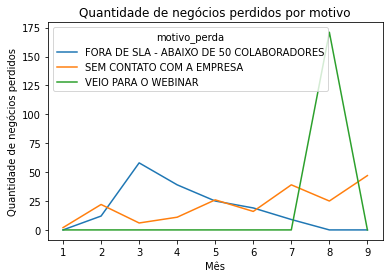

In [16]:
#Quais os 3 principais motivos de perda por etapa por mês?

max_data_perda = np.max(dados_gerais['data_desistencia'])
df_motivo_perda = dados_gerais[dados_gerais['data_desistencia']<=max_data_perda].groupby(by='motivo_perda').\
                                                                agg(qnt_leads=pd.NamedAgg('id_lead','count')).reset_index()
df_motivo_perda_ordenada = df_motivo_perda.sort_values(['qnt_leads'], ascending=False)
print("\nPrincipais motivos da perda de negócios: ")
print(df_motivo_perda_ordenada)
print("\nOs três principais motivos pra perda")
print(df_motivo_perda_ordenada.head(3))

df_filtro_motivo_desistencia = dados_gerais.groupby([dados_gerais['data_desistencia'].dt.year.rename('ano'),
                      dados_gerais['data_desistencia'].dt.month.rename('mes'),'motivo_perda']).agg(qnt_leads=pd.NamedAgg('id_lead',
                                                                            'count')).reset_index()
print(df_filtro_motivo_desistencia)
df_principais_motivos_perda = df_motivo_perda_ordenada['motivo_perda'].head(3)
print(df_principais_motivos_perda)
df_graf_line_motivo_perda = df_filtro_motivo_desistencia[df_filtro_motivo_desistencia['motivo_perda'].isin(df_principais_motivos_perda)]
df_graf_line_motivo_perda = df_graf_line_motivo_perda.pivot(index = 'mes', columns = 'motivo_perda', values = 'qnt_leads')
df_graf_line_motivo_perda = df_graf_line_motivo_perda.fillna(0)
print(df_graf_line_motivo_perda)
df_graf_line_motivo_perda.plot.line()
plt.xlabel("Mês")
plt.ylabel("Quantidade de negócios perdidos")
plt.title("Quantidade de negócios perdidos por motivo")
plt.show()